In [24]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
import random
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('ratings_small.csv', sep=',', header=0)

# Criar a matriz de usuários e filmes (A)
A = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Exibir o início da matriz para visualização
A

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Selecionar uma posição aleatória na matriz A
i = random.randint(0, A.shape[0] - 1)
j = random.randint(0, A.shape[1] - 1)

# Gerar a matriz B com o valor "estragado"
B = A.copy()
B.iloc[i, j] = random.uniform(0, 5)  # Substituir por um valor aleatório entre 0 e 5
print(f"Valor original da posição ({i}, {j}): {A.iloc[i, j]}")
print(f"Valor 'estragado' inserido na posição ({i}, {j}): {B.iloc[i, j]}")


Valor original da posição (272, 6522): 0.0
Valor 'estragado' inserido na posição (272, 6522): 1.2730013681667507


In [26]:
# Decomposição SVD da matriz B (estragada)
U, S, Vt = svd(B, full_matrices=False)

# Reduzir a dimensão dos dados para k componentes principais
k = 50  # Número de componentes principais
U_reduced = U[:, :k]
S_reduced = np.diag(S[:k])
Vt_reduced = Vt[:k, :]

# Reconstrução aproximada da matriz B (estragada)
B_approx = np.dot(np.dot(U_reduced, S_reduced), Vt_reduced)

# Previsão do valor original
predicted_value = B_approx[i, j]

# Exibir o valor real, o valor estragado e o valor previsto
print(f"Valor real: {A.iloc[i, j]}")
print(f"Valor previsto: {predicted_value}")

Valor real: 0.0
Valor previsto: 0.05969232719703061


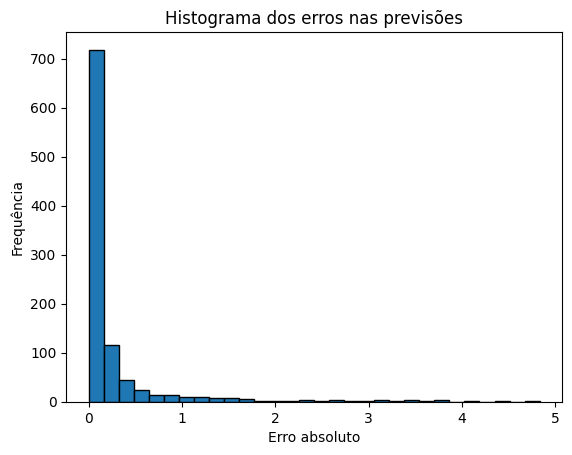

In [27]:
# Lista para armazenar os erros
errors = []

# Número de estimativas
n_estimates = 1000

for _ in range(n_estimates):
    # Selecionar uma posição aleatória
    i = random.randint(0, A.shape[0] - 1)
    j = random.randint(0, A.shape[1] - 1)
    
    # Gerar a matriz B (estragada) novamente para cada iteração
    B = A.copy()
    B.iloc[i, j] = random.uniform(0, 5)
    
    # Decompor a matriz estragada
    U, S, Vt = svd(B, full_matrices=False)
    U_reduced = U[:, :k]
    S_reduced = np.diag(S[:k])
    Vt_reduced = Vt[:k, :]
    
    # Prever o valor original
    B_approx = np.dot(np.dot(U_reduced, S_reduced), Vt_reduced)
    predicted_value = B_approx[i, j]
    
    # Calcular o erro
    real_value = A.iloc[i, j]
    error = abs(real_value - predicted_value)
    errors.append(error)

# Gerar o histograma dos erros
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Erro absoluto')
plt.ylabel('Frequência')
plt.title('Histograma dos erros nas previsões')
plt.show()
print("Gerado com sucesso!")